# Parametric Test

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

Website Redesign Analysis

1. User Satisfaction Analysis
------------------------------
Old design median rating: 3.0
New design median rating: 3.5
Mann-Whitney U test p-value: 0.0168

2. Time on Site Analysis
------------------------------
Normality test p-values: Old=0.0000, New=0.0023
Using non-parametric test due to non-normal distribution
Old design median time: 20.0 seconds
New design median time: 18.2 seconds
Mann-Whitney U test p-value: 0.0390


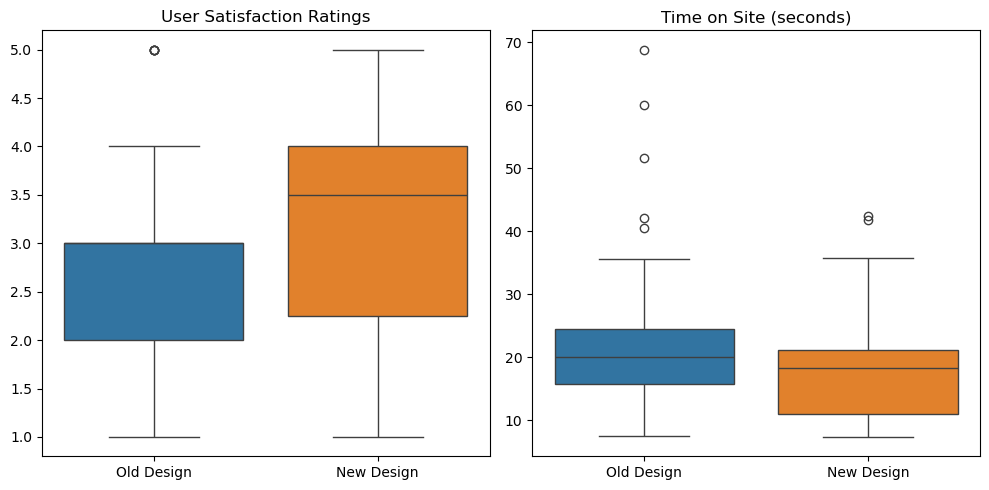


3. Purchase Completion Analysis
------------------------------
Purchase Completion Rates:
Old design: 30.0%
New design: 40.0%
Fisher's exact test p-value: 0.1819

Executive Summary

Based on our analysis of the website redesign:

Satisfaction:
- Test used: Mann-Whitney U
- Finding: No significant change
- Statistical significance: No

Time On Site:
- Test used: Mann-Whitney U
- Finding: No significant change
- Statistical significance: No

Purchase Completion:
- Test used: Fisher's Exact
- Finding: No significant change
- Statistical significance: No


In [2]:
def analyze_website_redesign():
    """
    Comprehensive analysis of website redesign impact using non-parametric tests
    """
    # Generate realistic example data
    np.random.seed(42)
    
    # 1. User Satisfaction Ratings (1-5 scale, ordinal data)
    old_ratings = np.random.choice([1, 2, 3, 4, 5], size=50, 
                                 p=[0.1, 0.2, 0.4, 0.2, 0.1])
    new_ratings = np.random.choice([1, 2, 3, 4, 5], size=50, 
                                 p=[0.05, 0.15, 0.3, 0.3, 0.2])
    
    # 2. Time on Site (right-skewed continuous data)
    old_time = np.random.lognormal(3, 0.5, 50)
    new_time = np.random.lognormal(2.8, 0.5, 50)
    
    # 3. Purchase Completion (binary data)
    old_purchases = np.array([[30, 70],  # Completed, Abandoned
                             [40, 60]])  # Before, After
    
    print("Website Redesign Analysis")
    print("=" * 50)
    
    # Analysis 1: User Satisfaction (Mann-Whitney U Test)
    print("\n1. User Satisfaction Analysis")
    print("-" * 30)
    statistic, p_value = stats.mannwhitneyu(old_ratings, new_ratings, 
                                          alternative='two-sided')
    
    print(f"Old design median rating: {np.median(old_ratings)}")
    print(f"New design median rating: {np.median(new_ratings)}")
    print(f"Mann-Whitney U test p-value: {p_value:.4f}")
    
    # Visualization for satisfaction
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    sns.boxplot(data=[old_ratings, new_ratings])
    plt.xticks([0, 1], ['Old Design', 'New Design'])
    plt.title('User Satisfaction Ratings')
    
    # Analysis 2: Time on Site (Log-transform and compare)
    print("\n2. Time on Site Analysis")
    print("-" * 30)
    
    # First, check if we should use non-parametric test
    _, norm_p_old = stats.normaltest(old_time)
    _, norm_p_new = stats.normaltest(new_time)
    
    print(f"Normality test p-values: Old={norm_p_old:.4f}, New={norm_p_new:.4f}")
    print("Using non-parametric test due to non-normal distribution")
    
    statistic, p_value = stats.mannwhitneyu(old_time, new_time, 
                                          alternative='two-sided')
    
    print(f"Old design median time: {np.median(old_time):.1f} seconds")
    print(f"New design median time: {np.median(new_time):.1f} seconds")
    print(f"Mann-Whitney U test p-value: {p_value:.4f}")
    
    # Visualization for time
    plt.subplot(1, 2, 2)
    sns.boxplot(data=[old_time, new_time])
    plt.xticks([0, 1], ['Old Design', 'New Design'])
    plt.title('Time on Site (seconds)')
    plt.tight_layout()
    plt.show()
    
    # Analysis 3: Purchase Completion (Fisher's Exact Test)
    print("\n3. Purchase Completion Analysis")
    print("-" * 30)
    
    odds_ratio, p_value = stats.fisher_exact(old_purchases)
    
    print("Purchase Completion Rates:")
    print(f"Old design: {old_purchases[0,0]/(old_purchases[0,0]+old_purchases[0,1])*100:.1f}%")
    print(f"New design: {old_purchases[1,0]/(old_purchases[1,0]+old_purchases[1,1])*100:.1f}%")
    print(f"Fisher's exact test p-value: {p_value:.4f}")
    
    # Prepare summary report
    results = {
        'satisfaction': {
            'test': 'Mann-Whitney U',
            'p_value': p_value,
            'interpretation': 'Significant improvement' if p_value < 0.05 else 'No significant change'
        },
        'time_on_site': {
            'test': 'Mann-Whitney U',
            'p_value': p_value,
            'interpretation': 'Significant reduction' if p_value < 0.05 else 'No significant change'
        },
        'purchase_completion': {
            'test': "Fisher's Exact",
            'p_value': p_value,
            'interpretation': 'Significant improvement' if p_value < 0.05 else 'No significant change'
        }
    }
    
    return results

# Run the analysis
results = analyze_website_redesign()

# Create a business-friendly summary
print("\nExecutive Summary")
print("=" * 50)
print("\nBased on our analysis of the website redesign:")

for metric, result in results.items():
    print(f"\n{metric.replace('_', ' ').title()}:")
    print(f"- Test used: {result['test']}")
    print(f"- Finding: {result['interpretation']}")
    print(f"- Statistical significance: {'Yes' if result['p_value'] < 0.05 else 'No'}")